# Importing Packages for different calculations

In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si

# Importing data for ""1INCH-USD"" from yahoo finance for two year time period.

In [5]:
data = yf.download("1INCH-USD", start="2020-11-29", end="2022-11-29")

[*********************100%***********************]  1 of 1 completed


In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-25,1.602781,2.918094,1.375262,2.328544,2.328544,638225549
2020-12-26,2.318946,2.434916,1.582264,1.596896,1.596896,237653073
2020-12-27,1.597744,1.630781,1.056657,1.062112,1.062112,183978307
2020-12-28,1.064454,1.254447,1.049051,1.110076,1.110076,119337529
2020-12-29,1.110460,1.111282,0.761151,0.887798,0.887798,137916899


# Plotting the shape for over 2 year period

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

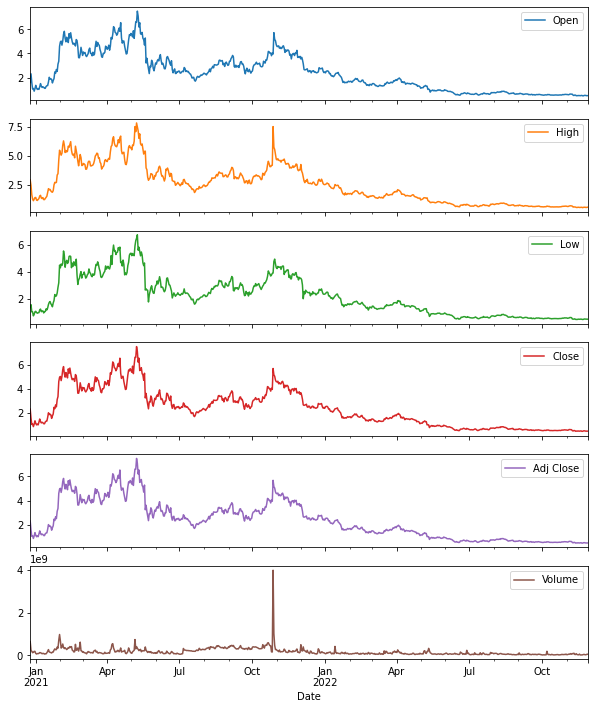

In [7]:
data.plot(figsize=(10, 12), subplots=True)

Importing Data For "1INCH-USD" of 3 Month Period 

In [17]:
data = yf.download("1INCH-USD", start="2022-08-29", end="2022-11-29")

[*********************100%***********************]  1 of 1 completed


# Calculating Annualized Volatility

In [18]:
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

The volatility is multiplied by the square root of 365, or the number of trading days for a cryptocurrency each year, to annualize it.

In [19]:
vol = np.sqrt(365) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 69.14 %


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

METHODOLOGIES USED TO CALCULATE PRICES FOR CALL OPTION

(1) BLACK SCHOLES METHOD (2) MONTE CARLO SIMULATION

# BLACK SCHOLES 

In [24]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
     #S: spot price 
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

Variables

In [25]:
S = 0.51
K = 0.65
T = 0.25  # 3 Month Time Period
r = 0.03
vol = 0.69

In [26]:
euro_option_bs(S, K, T, r, vol, 'call')

0.02893730556008417

Call price from Black Scholes method

In [27]:
S = np.linspace(0.06,0.8,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 0.65, 0.25, 0.03, 0.699, 'call')

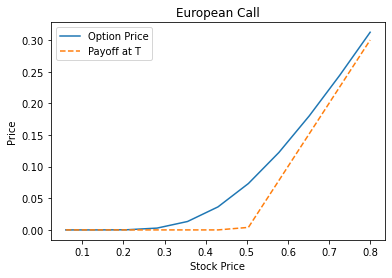

In [28]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-0.5,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

# MONTE CARLO SIMULATION

In [30]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

VARIABLES

In [39]:
T = 0.25        # maturity
r = 0.03        # risk free rate
sigma = 0.69    # diffusion coefficient or volatility
S0 = 0.51       # spot price
K = 0.65        # strike price

In [40]:
S = mcs_simulation_np(100)

In [41]:
S = np.transpose(S)
S

array([[0.51      , 0.51160811, 0.5021786 , ..., 0.44298086, 0.44064827,
        0.4335096 ],
       [0.51      , 0.52462497, 0.53471672, ..., 0.71273009, 0.7235024 ,
        0.72410352],
       [0.51      , 0.51809215, 0.5128142 , ..., 0.51975597, 0.54192942,
        0.54134143],
       ...,
       [0.51      , 0.49965026, 0.51593197, ..., 0.61052015, 0.63142872,
        0.60382885],
       [0.51      , 0.52881842, 0.54407761, ..., 0.40399729, 0.41194763,
        0.4157295 ],
       [0.51      , 0.5059205 , 0.52654263, ..., 0.31192292, 0.32328784,
        0.3260561 ]])

In [42]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 0.020369341125316312


# CALCULATING GREEKS FOR RISK MANAGEMENT

So as to plot graph for each greek,imorting package for 3d Graph

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# GREEKS

# (1) DELTA

In [2]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

VARIABLES

In [3]:
S = 0.51
K = 0.65
T = 0.25
r = 0.03
q = 0         # q is zero because 1INCH is a cryptocurrency
vol = 0.69

In [6]:
delta(S, K, T, r, q, vol, 'call')

0.3054328629979818

In [48]:
S = np.linspace(0.10, 0.50, 30)
T = np.linspace(0.10, 0.7, 30)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 0.65, T[i], 0.03, 0, 0.69, 'call')

/var/folders/xw/jbvfdq0n1ylc4bbdgwnp1ygr0000gp/T/ipykernel_15167/3601117308.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


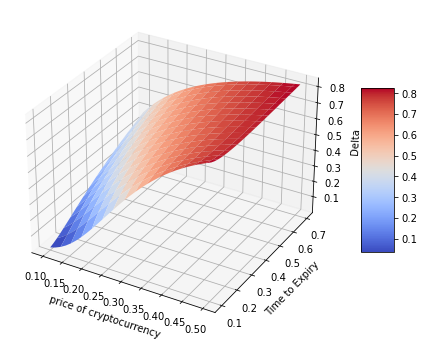

In [49]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('price of cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# (2) GAMMA

In [50]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

VARIABLES

In [51]:
S = 0.51
K = 0.65
T = 0.25
r = 0.03
q = 0         # q is zero because 1INCH is a cryptocurrency
vol = 0.69

In [52]:
gamma(S, K, T, r, q, vol, 'call')

1.9771546917205318

In [54]:
S = np.linspace(0.10, 0.5, 30)
T = np.linspace(0.10, 0.7, 30)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 0.65, T[i], 0.03, 0, 0.69, 'call')

/var/folders/xw/jbvfdq0n1ylc4bbdgwnp1ygr0000gp/T/ipykernel_15167/3894109105.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


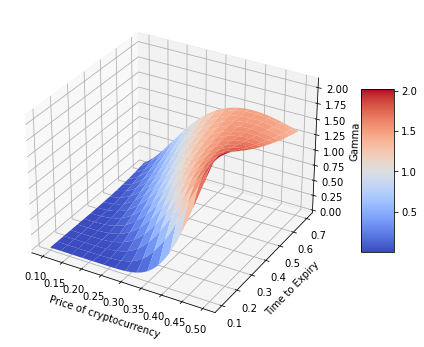

In [55]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Price of cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# (3) RHO

In [9]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

VARIABLES

In [10]:
S = 0.51
K = 0.65
T = 0.25
r = 0.03
q = 0         # q is zero because 1INCH is a cryptocurrency
vol = 0.69

In [11]:
rho(S, K, T, r, q, vol, 'call')

0.03170836364222163

In [63]:
S = np.linspace(0.10, 0.5, 30)
T = np.linspace(0.10, 0.7, 30)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 0.65, T[i], 0.03, 0, 0.69, 'call')

/var/folders/xw/jbvfdq0n1ylc4bbdgwnp1ygr0000gp/T/ipykernel_15167/3090571425.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


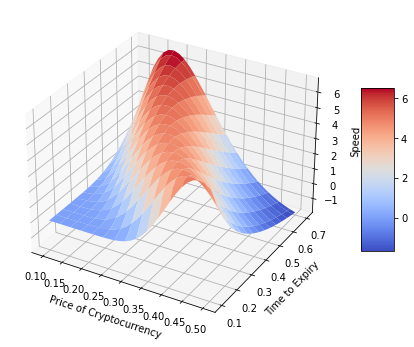

In [64]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Price of Cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

# (4) THETA

In [65]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

VARIABLES

In [66]:
S = 0.51
K = 0.65
T = 0.25
r = 0.03
q = 0         # q is zero because 1INCH is a cryptocurrency
vol = 0.69

In [67]:
theta(S, K, T, r, q, vol, 'call')

0.1271457000614139

In [68]:
S = np.linspace(0.10, 0.50, 30)
T = np.linspace(0.10, 0.7, 30)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 0.65, T[i], 0.03, 0, 0.69, 'call')

/var/folders/xw/jbvfdq0n1ylc4bbdgwnp1ygr0000gp/T/ipykernel_15167/1244808799.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


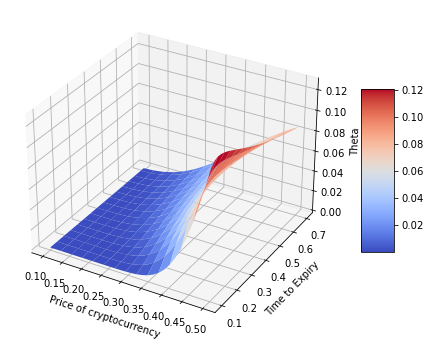

In [69]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Price of cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# (5) VEGA

In [70]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

VARIABLES

In [71]:
S = 0.51
K = 0.65
T = 0.25
r = 0.03
q = 0         # q is zero because 1INCH is a cryptocurrency
vol = 0.69

In [72]:
vega(S, K, T, r, q, vol, 'call')

0.08937731624952704

In [74]:
S = np.linspace(0.10, 0.50, 30)
T = np.linspace(0.10, 0.70, 30)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 0.65, T[i], 0.03, 0, 0.69, 'call')

/var/folders/xw/jbvfdq0n1ylc4bbdgwnp1ygr0000gp/T/ipykernel_15167/1141581300.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


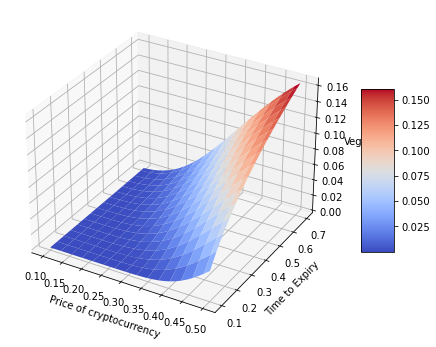

In [75]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Price of cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);